In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# Load your data set
df = pd.read_csv('mobile_price_1.csv')

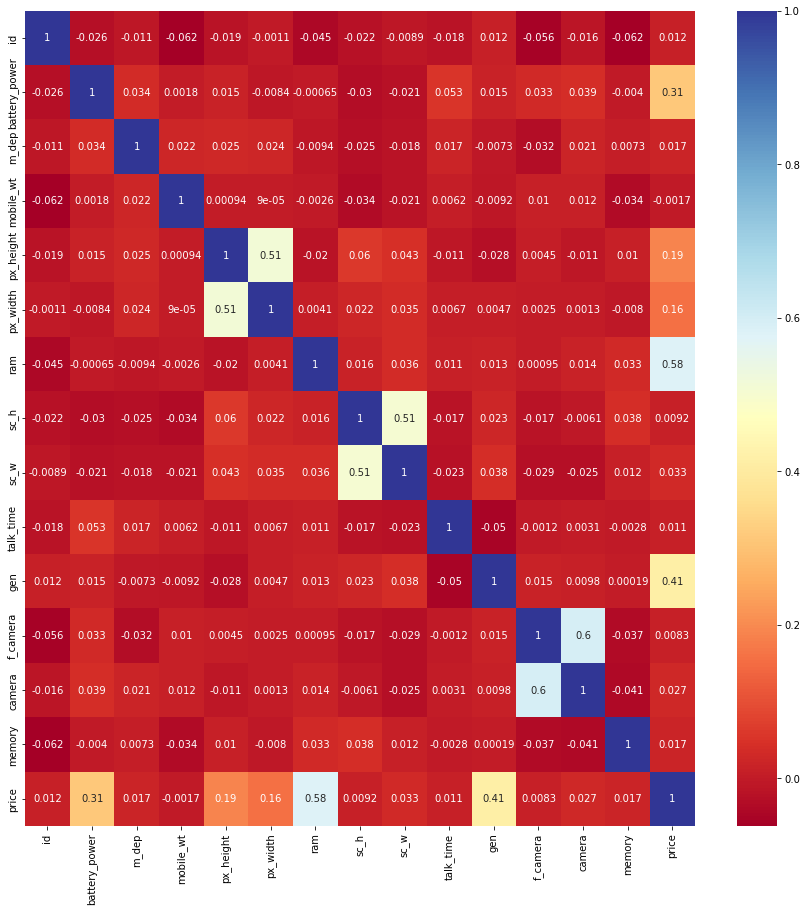

In [44]:
### task 1 -
### 1. Plot a correlation heatmap 
### of the data set and include it.

# Calculate the pairwise correlations
corr = df.corr()
fix, ax = plt.subplots(figsize=(15,15))
# Plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='RdYlBu', )
plt.show()

In [4]:
### 2) we can see that the features that are correlated with the device price are battery power, generation, px_height and px_width, and ram 

In [5]:
# ### 3) Are there features not shown in the 
####  correlation matrix that are correlated 
####  with the price? If so,  what are they? (The response for this can be written in words, not code.)

In [6]:

# Create binary features using one-hot encoding
df_new = df[['wifi', 'bluetooth', 'cores' , 'speed' , 'sim' , 'screen', 'price']].copy()


<AxesSubplot:xlabel='wifi', ylabel='price'>

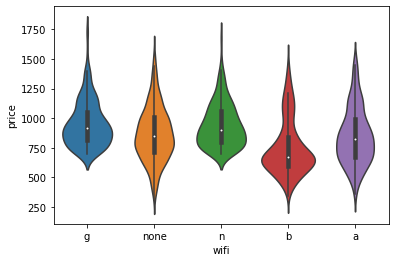

In [7]:
### as we can see the wifi and price definitely have differences
sns.violinplot(x="wifi", y="price", data=df_new , label="Wifi group")

<AxesSubplot:xlabel='bluetooth', ylabel='price'>

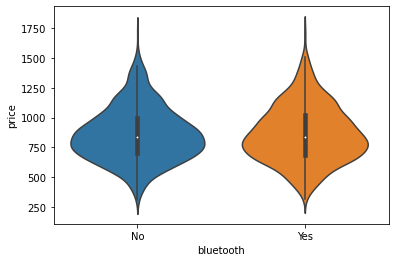

In [8]:
sns.violinplot(x="bluetooth", y="price", data=df, label="bluetooth group")

<AxesSubplot:xlabel='cores', ylabel='price'>

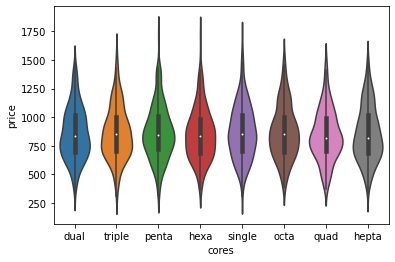

In [9]:
sns.violinplot(x="cores", y="price", data=df, label="cores group")

<AxesSubplot:xlabel='speed', ylabel='price'>

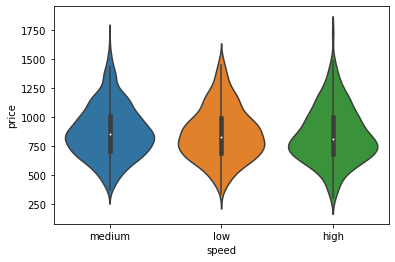

In [10]:
sns.violinplot(x="speed", y="price", data=df, label="speed group")

<AxesSubplot:xlabel='sim', ylabel='price'>

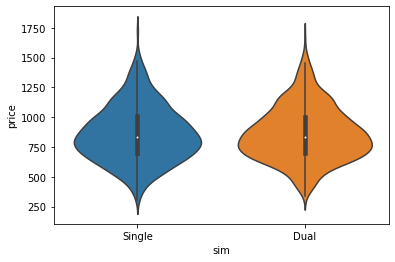

In [11]:
sns.violinplot(x="sim", y="price", data=df, label="sim group")

<AxesSubplot:xlabel='screen', ylabel='price'>

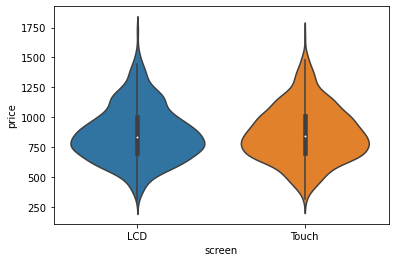

In [12]:
sns.violinplot(x="screen", y="price", data=df, label="screen group")

In [13]:
### answer for 3 - wifi can be seen as a correlation to price and 

In [14]:
### 4)For each feature correlated with the price, plot its relationship with price. 
### Create a separate plot for each feature you mentioned in question 2. 


In [15]:
plot_data = df[['sim','battery_power', 'gen', 'ram', 'px_width', 'px_height', 'price', 'speed', 'cores', 'bluetooth', 'wifi']].copy()

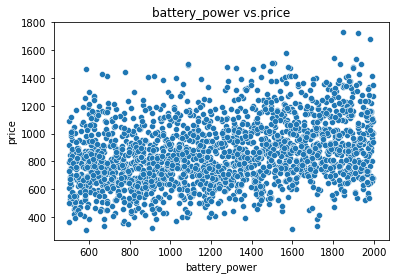

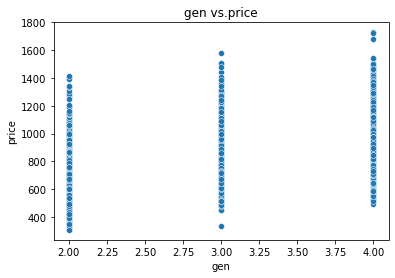

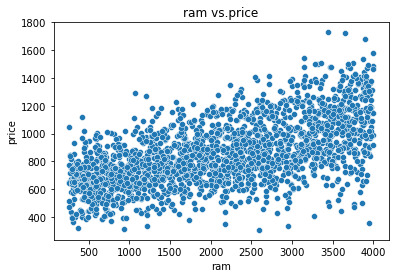

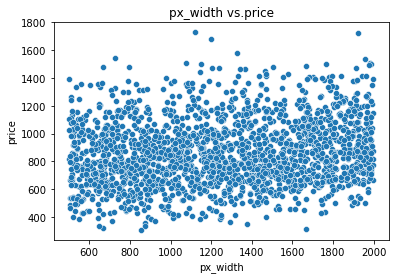

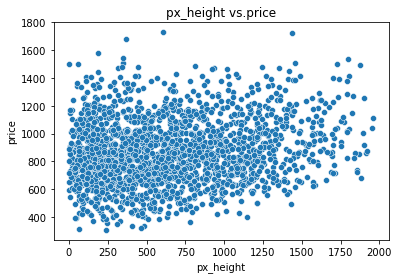

In [16]:
features = ['battery_power', 'gen' , 'ram' , 'px_width' , 'px_height']
# Iterate over the list of features
for feature in features:
# Create a scatterplot of the feature and the price
    sns.scatterplot(x=feature, y='price', data=plot_data)
    plt.title(str(feature)+' vs.'+ 'price')
    plt.show()

In [17]:
###task 2 ordinal features are - speed, cores, sim

In [18]:
### 1) For each ordinal feature <O>, 
### add a column to the dataframe which holds the 
### ordered values  representing each original value 
### of F. This new column will be named <O>_ord. 
### (without the  triangle brackets) 

In [19]:


# Select the ordinal feature speed
ordinal_feature_speed = 'speed'

# Create a dictionary mapping the original values to the ordered values
ordinal_mapping_speed = {'low': 1, 'medium': 2, 'high': 3}

# Add a new column to the dataframe with the ordered values
plot_data[ordinal_feature_speed + '_ord'] = plot_data[ordinal_feature_speed].apply(lambda x: ordinal_mapping_speed[x])

# Select the ordinal feature speed
ordinal_feature_cores = 'cores'

# Create a dictionary mapping the original values to the ordered values
ordinal_mapping_cores = {'single': 1, 'dual': 2, 'triple' : 3, 'quad' : 4 , 'penta' : 5, 'hexa': 6, 'hepta':7 , 'octa' : 8}

# Add a new column to the dataframe with the ordered values
plot_data[ordinal_feature_cores + '_ord'] = plot_data[ordinal_feature_cores].apply(lambda x: ordinal_mapping_cores[x])

# Select the ordinal feature speed
ordinal_feature_sim = 'sim'

# Create a dictionary mapping the original values to the ordered values
ordinal_mapping_sim = {'Single': 1, 'Dual': 2}

# Add a new column to the dataframe with the ordered values
plot_data[ordinal_feature_sim + '_ord'] = plot_data[ordinal_feature_sim].apply(lambda x: ordinal_mapping_sim[x])



In [20]:
### 2. For each nominal feature <N>, add a 
### binary column OR one-hot encoding (whichever is 
### relevant  for that feature) to 
### the dataframe representing the original values. 
### Name binary columns  <N>_bin, and prefix one-hot 
### encodings with <N>. (without the triangle brackets) 

In [21]:
###nominal features :
### bluetooth, gen, cores, sim, f_camera, camera
### memory, screen, wifi

In [22]:
# Select the nominal feature
nominal_feature_bluetooth = 'bluetooth'

# Add a new column to the dataframe with binary values
plot_data[nominal_feature_bluetooth + '_bin'] = plot_data[nominal_feature_bluetooth].apply(lambda x: 1 if x == 'Yes' else 0)

In [23]:
# Perform one-hot encoding of the nominal feature
one_hot_gen = pd.get_dummies(plot_data['gen'], prefix='gen')

# Add the one-hot encoded columns to the dataframe
plot_data = pd.concat([plot_data, one_hot_gen], axis=1)

In [24]:
# Perform one-hot encoding of the nominal feature
one_hot_cores = pd.get_dummies(plot_data['cores'], prefix='cores')

# Add the one-hot encoded columns to the dataframe
plot_data = pd.concat([plot_data, one_hot_cores], axis=1)

In [25]:
# Perform one-hot encoding of the nominal feature
one_hot_screen = pd.get_dummies(df['screen'], prefix='screen')

# Add the one-hot encoded columns to the dataframe
plot_data = pd.concat([plot_data, one_hot_screen], axis=1)

In [26]:
# Perform one-hot encoding of the nominal feature
one_hot_wifi = pd.get_dummies(df['wifi'], prefix='wifi')

# Add the one-hot encoded columns to the dataframe
plot_data = pd.concat([plot_data, one_hot_wifi], axis=1)

In [27]:
# Perform one-hot encoding of the nominal feature
one_hot_sim = pd.get_dummies(df['sim'], prefix='sim')

# Add the one-hot encoded columns to the dataframe
plot_data = pd.concat([plot_data, one_hot_sim], axis=1)

In [28]:
plot_data

,sim,battery_power,gen,ram,px_width,px_height,price,speed,cores,bluetooth,...,cores_triple,screen_LCD,screen_Touch,wifi_a,wifi_b,wifi_g,wifi_n,wifi_none,sim_Dual,sim_Single
0,Single,842,2,2549,756,20,751.64,medium,dual,No,...,0,1,0,0,0,1,0,0,0,1
1,Dual,1021,4,2631,1988,905,885.17,low,triple,Yes,...,1,0,1,0,0,0,0,1,1,0
2,Dual,563,4,2603,1716,1263,1067.78,low,penta,Yes,...,0,0,1,0,0,0,0,1,1,0
3,Single,615,3,2769,1786,1216,819.22,high,hexa,Yes,...,0,1,0,0,0,0,0,1,0,1
4,Single,1821,4,1411,1212,1208,1023.13,medium,dual,Yes,...,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Dual,794,4,668,1890,1222,729.34,low,hexa,Yes,...,0,0,1,0,0,0,0,1,1,0
1996,Dual,1965,3,2032,1965,915,1157.94,high,quad,Yes,...,0,0,1,0,0,0,1,0,1,0
1997,Dual,1911,4,3057,1632,868,1351.51,low,octa,No,...,0,0,1,0,0,0,0,1,1,0
1998,Single,1512,4,869,670,336,846.52,low,penta,No,...,0,0,1,0,0,1,0,0,0,1


In [29]:
### 3. Plot a correlation heatmap of the 
### modified data set and include it.  

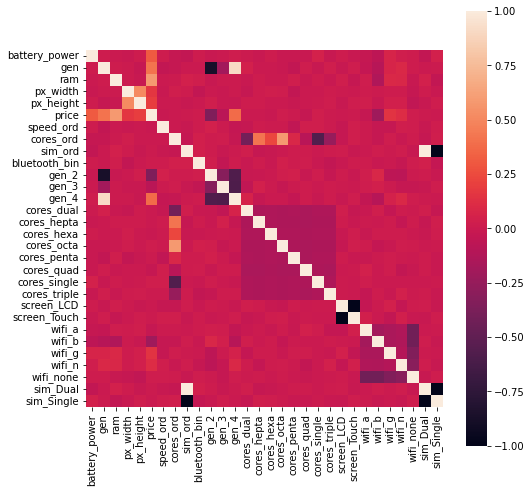

In [30]:
corr = plot_data.corr()
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns ,square=True,)
plt.show()

In [31]:
### 4. Save the entire dataframe to a csv file named 
### “mobile_prices_converted.csv” and include it in  
### the submission. Make sure you don’t add a 
### redundant index column.

In [32]:
plot_data.to_csv("mobile_prices_converted.csv", index=False)

In [33]:
###task 3

In [34]:
### 1) Choose 4 features and use a 2-d plot to show the 
###  relationships between each pair. This should  
### be done in the form of a 4x4 plot matrix 
### as shown in class. 


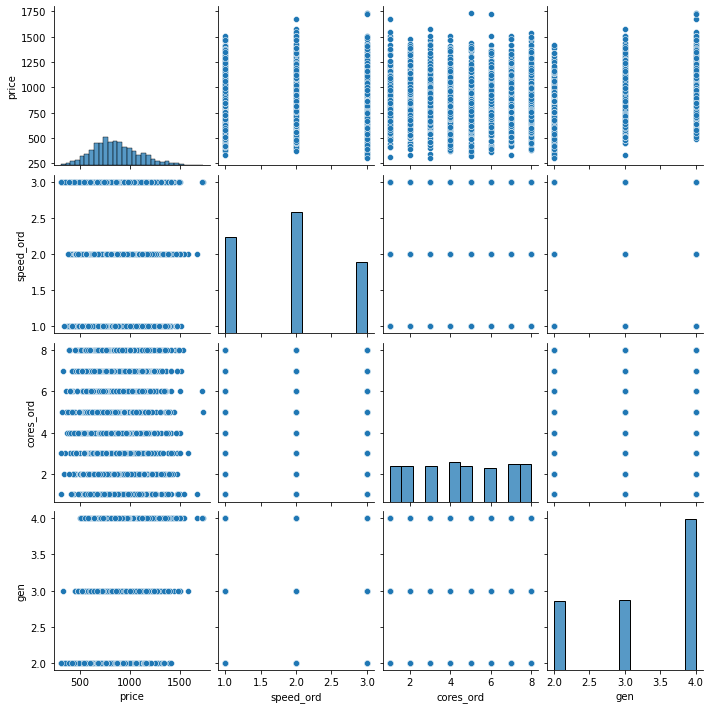

In [35]:
# Create a pairplot of the selected features
features = ['price', 'speed_ord', 'cores_ord','gen']
sns.pairplot(plot_data, vars=features)

In [36]:
### 2. We have shown in class how to plot 4 
### dimensions of data in a 2-dimensional plot. 
### Use this  method to plot the relationship 
### between px_width, px_height, price and core. 
### Px_width and  px_height should be the X and Y 
### coordinates respectively.

<AxesSubplot:xlabel='px_width', ylabel='px_height'>

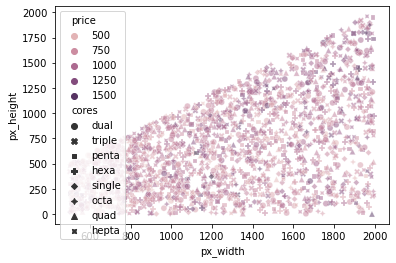

In [37]:
features = ['px_width', 'px_height', 'price', 'cores']

# Create a scatterplot matrix of the selected features
sns.scatterplot(data=plot_data, x='px_width', y='px_height', hue='price', style='cores', alpha=0.5)

In [38]:
### 3. There is an additional file named 
### “mobile_prices_2.csv” distributed alongside the 
### exercise. This  file contains a mapping of id to 
### price. This price is a transformation of the price 
### in the original  data set. The transformation has 
### been made based on a single feature from the data 
### set. Which  feature was used and how do you know? 
### Include any relevant plots and tables.

In [39]:
# Load your data set
df_2 = pd.read_csv('mobile_price_2.csv')

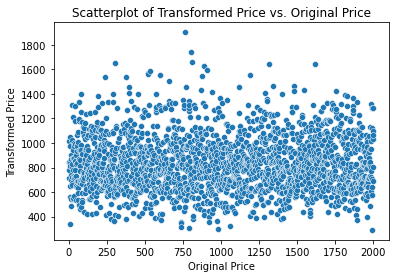

In [47]:
# Create a scatterplot of the transformed price against the original price
sns.scatterplot(x='id', y='price_2', data=df_2)

# Add labels and formatting to the plot
plt.xlabel('Original Price')
plt.ylabel('Transformed Price')
plt.title('Scatterplot of Transformed Price vs. Original Price')
plt.show()

In [41]:
plot_data

,sim,battery_power,gen,ram,px_width,px_height,price,speed,cores,bluetooth,...,cores_triple,screen_LCD,screen_Touch,wifi_a,wifi_b,wifi_g,wifi_n,wifi_none,sim_Dual,sim_Single
0,Single,842,2,2549,756,20,751.64,medium,dual,No,...,0,1,0,0,0,1,0,0,0,1
1,Dual,1021,4,2631,1988,905,885.17,low,triple,Yes,...,1,0,1,0,0,0,0,1,1,0
2,Dual,563,4,2603,1716,1263,1067.78,low,penta,Yes,...,0,0,1,0,0,0,0,1,1,0
3,Single,615,3,2769,1786,1216,819.22,high,hexa,Yes,...,0,1,0,0,0,0,0,1,0,1
4,Single,1821,4,1411,1212,1208,1023.13,medium,dual,Yes,...,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Dual,794,4,668,1890,1222,729.34,low,hexa,Yes,...,0,0,1,0,0,0,0,1,1,0
1996,Dual,1965,3,2032,1965,915,1157.94,high,quad,Yes,...,0,0,1,0,0,0,1,0,1,0
1997,Dual,1911,4,3057,1632,868,1351.51,low,octa,No,...,0,0,1,0,0,0,0,1,1,0
1998,Single,1512,4,869,670,336,846.52,low,penta,No,...,0,0,1,0,0,1,0,0,0,1


<AxesSubplot:>

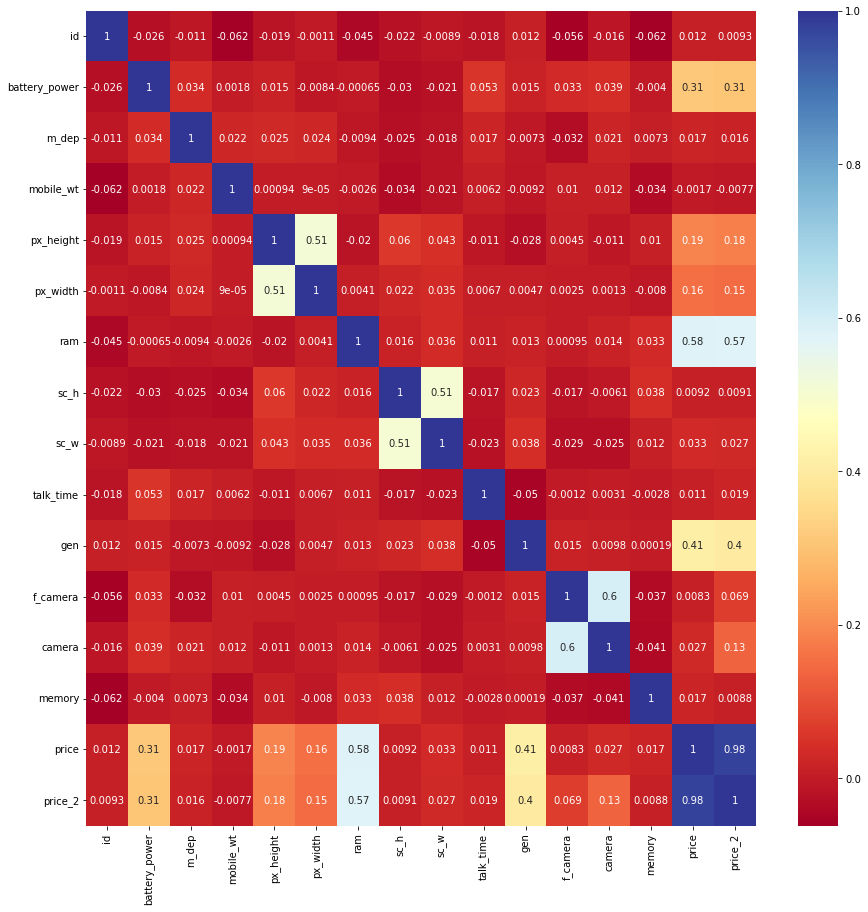

In [46]:
# Combine the two dataframes into a single dataframe
df_combined = pd.merge(df, df_2, on="id")
corr = df_combined.corr()
fix, ax = plt.subplots(figsize=(15,15))
# Create a heatmap of the correlations
sns.heatmap(corr, cmap='RdYlBu', annot=True)